In [161]:
# %%capture
# %run final_chars_classification.ipynb



In [171]:
%run table_detector.ipynb

In [163]:
%run final_functions.ipynb

In [164]:
%run preprocessing.ipynb

In [165]:
%run get_rows_number.ipynb

In [166]:
# initialize_models(True)
load_models()

In [167]:
from tabular import tabular
import math

In [180]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, showTrace)#, table= True)

        letters = [classify(i, is_letter=True, is_table=is_table) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True, is_table=is_table) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if True:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        num_outputs = col_num-int(math.log(row_num-1,2))
        print(f"num_outputs: {num_outputs}")
        solver.solve(cells=numbers, num_col=col_num, num_outputs=num_outputs)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        result = []
        for ex in expressions:
            try:
                ex[1] ='='
                result.append(get_table(ex))
            except:
                result.append('error')
        
        for r in result:
            print(r)

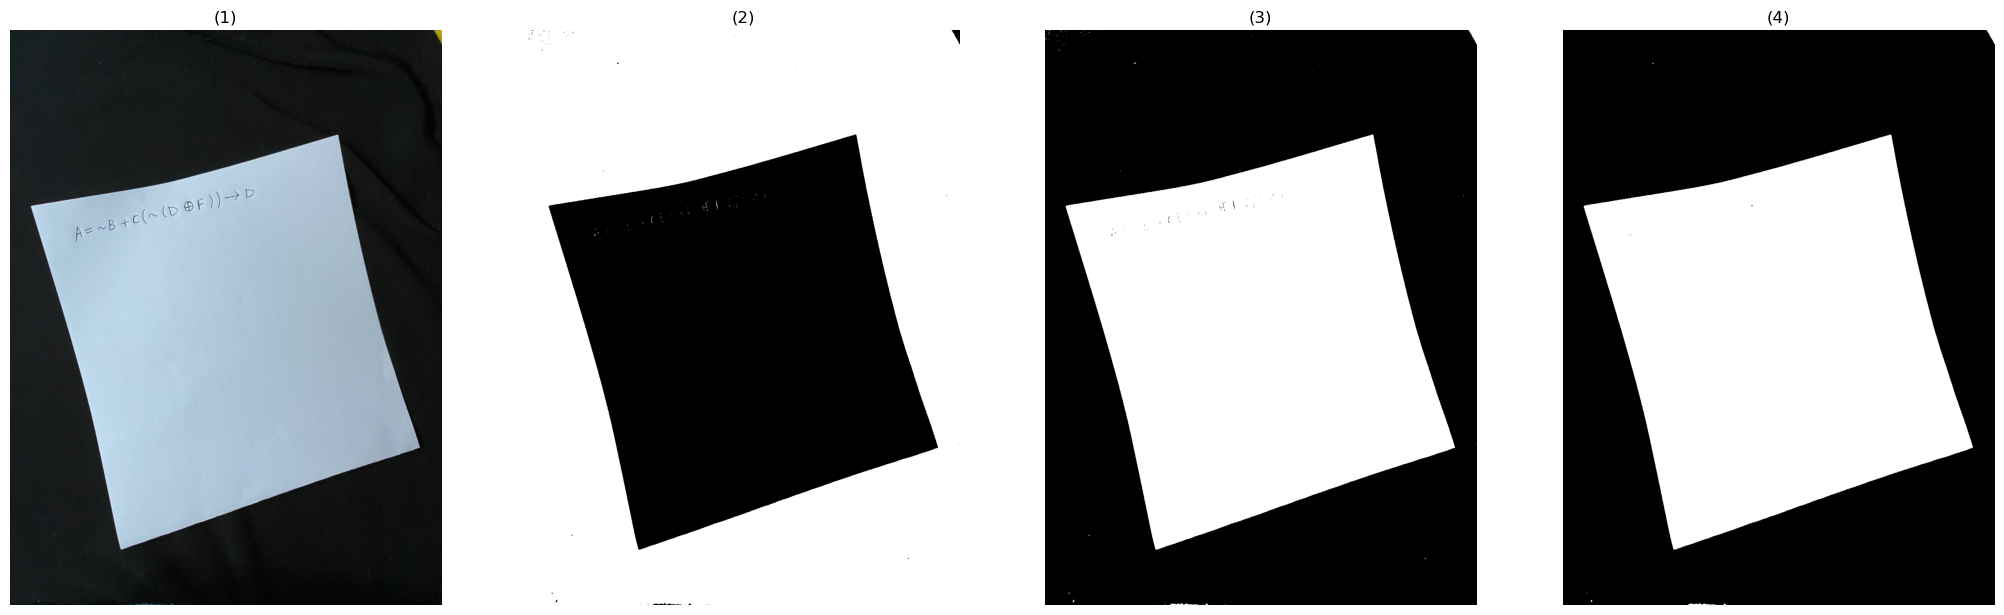

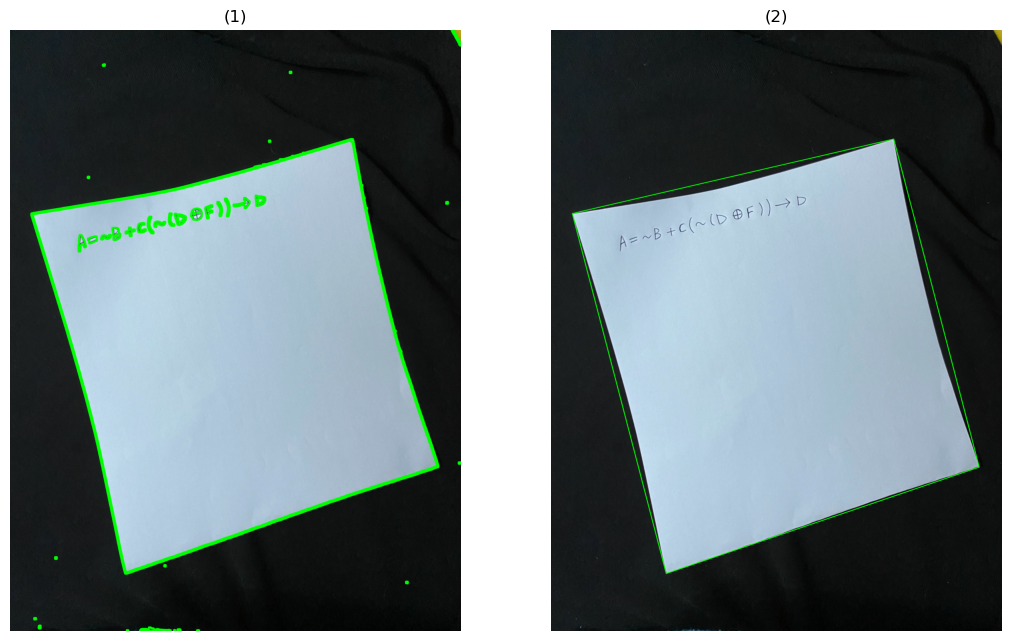

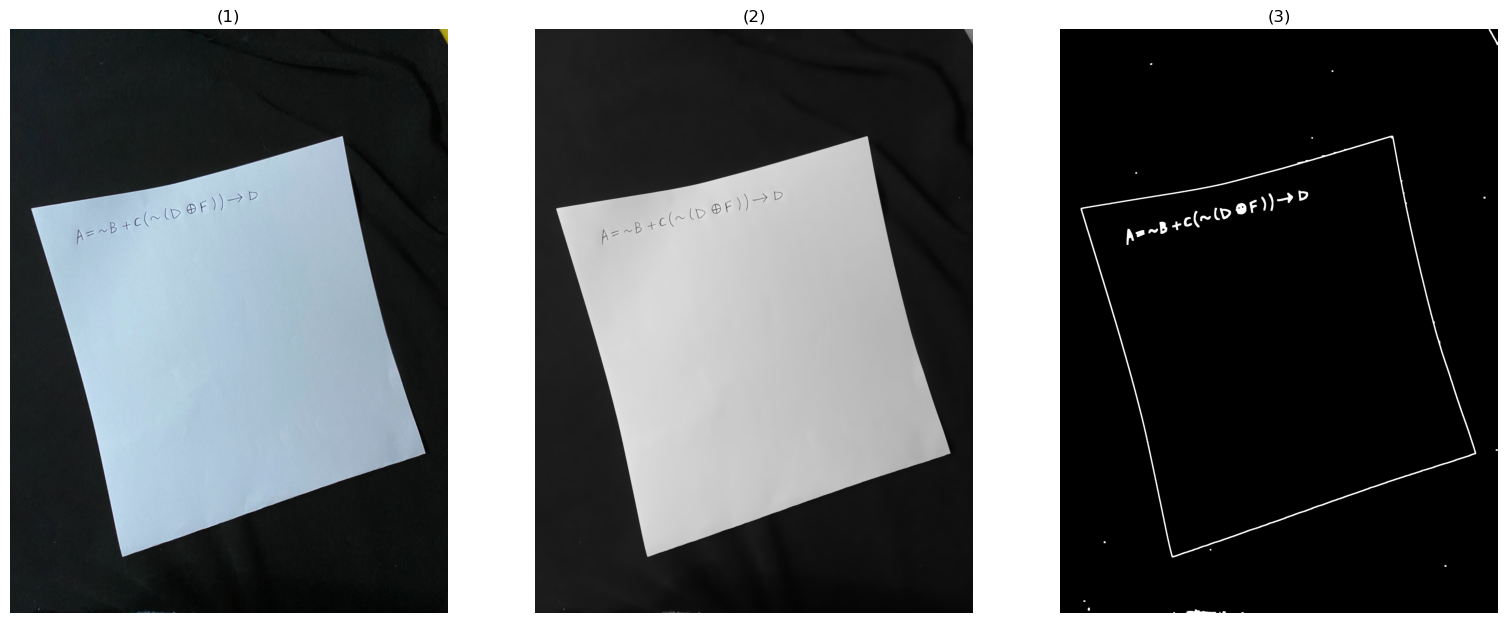

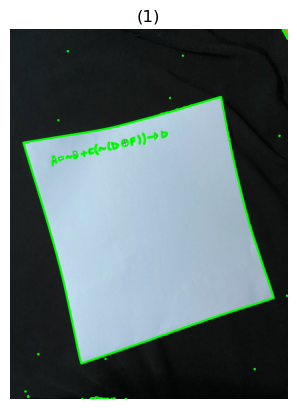

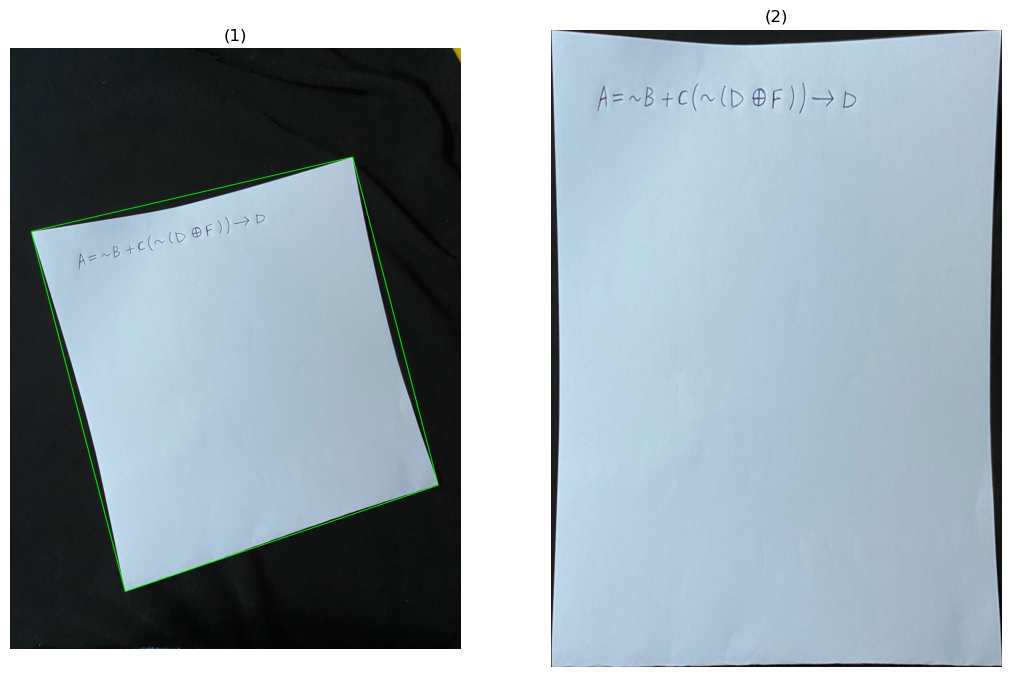

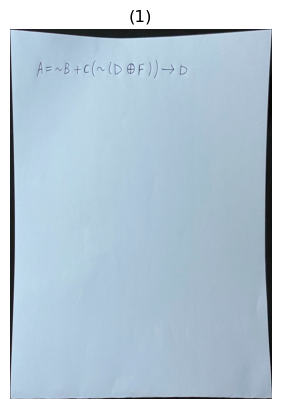

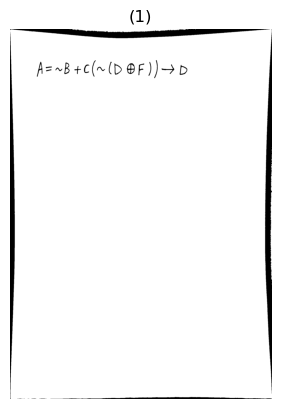

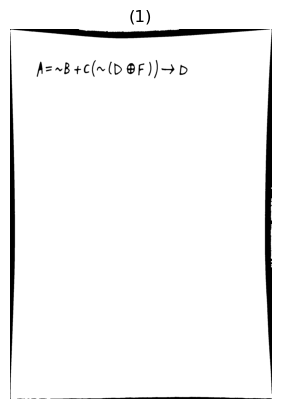

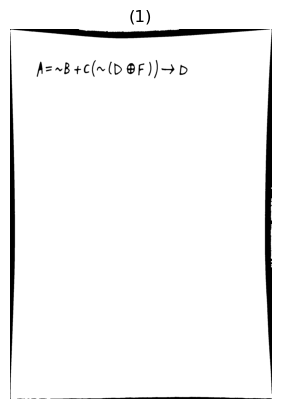

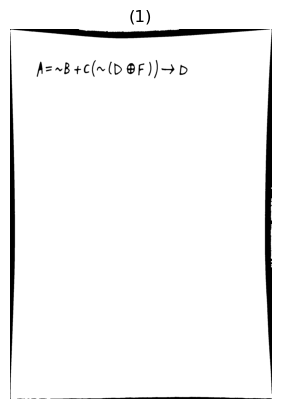

img shape: (2536, 1794), max=255, min=0,median=255.0 and type uint8
tolerance: 89.7


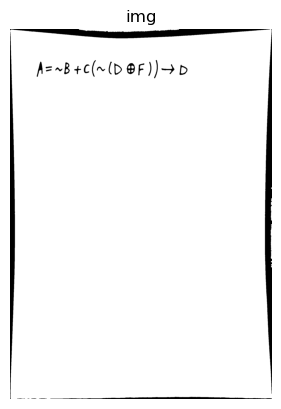

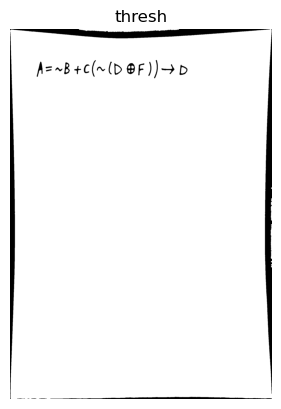

contours before area filtering
-88.0, -48.0, -1352.0, -570.5, -120.5, -77.0, -40.0, -151.0, -164.0, 358.5, -339.0, 589.5, -1154.5, 678.5, 413.0, 813.0, -218.5, -1310.5, -261.0, 2654.0, 972.0, 1465.0, -188.0, 1193.5, 2791.0, 3297.5, 2182.0, 800.0, 1783.0, 755.5, 1040.5, 929.0, -4335428.5, -8717.5, 
average_area 1336.2058823529412
max_width 91
max_height 127
contours after area filtering
4452, 736, 714, 1508, 3360, 2891, 2480, 3393, 1947, 2070, 4374, 4543, 3696, 2178, 3429, 6370, 4032, 
masks


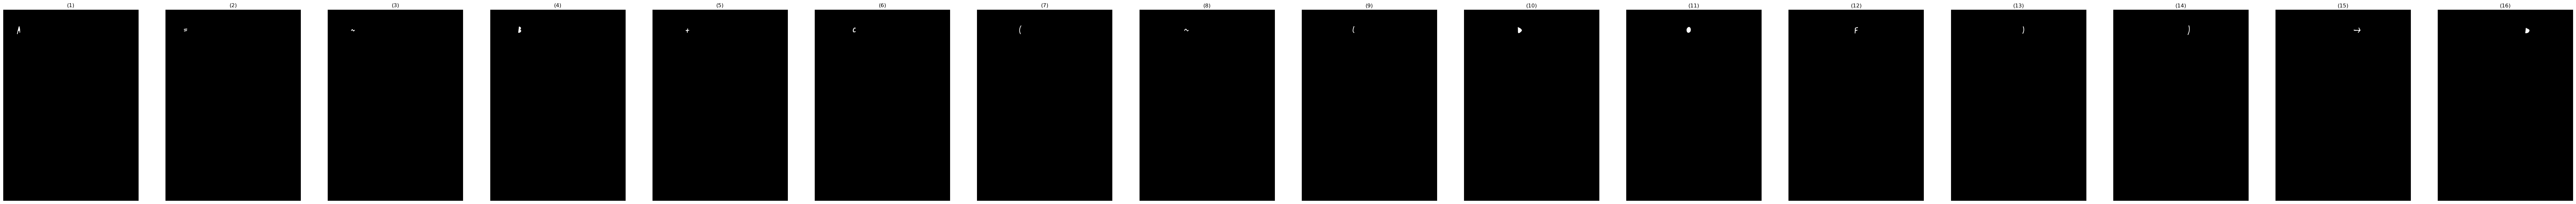

contours after merging


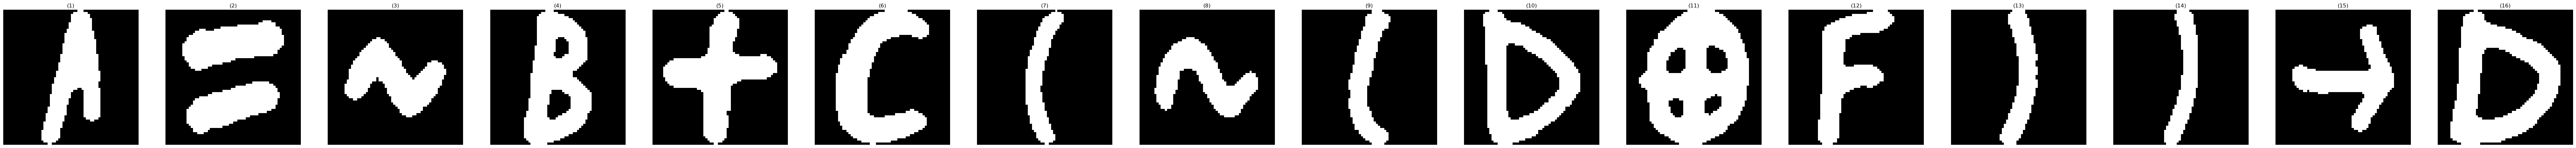

[array(['A', 'E', '~', 'B', '+', 'C', '(', '~', '(', 'D', 'xor', 'E', ')',
       ')', 'implies', 'D'], dtype='<U7')]
~ B or C and ( ~ ( D xor E ) ) implies D 
+-----+-----+-----+-----+---------------------------------------------+
|  D  |  E  |  B  |  C  |  ~ B or C and ( ~ ( D xor E ) ) implies D   |
|-----+-----+-----+-----+---------------------------------------------|
|  1  |  1  |  1  |  1  |                      1                      |
|  1  |  1  |  1  |  0  |                      1                      |
|  1  |  1  |  0  |  1  |                      1                      |
|  1  |  1  |  0  |  0  |                      1                      |
|  1  |  0  |  1  |  1  |                      1                      |
|  1  |  0  |  1  |  0  |                      1                      |
|  1  |  0  |  0  |  1  |                      1                      |
|  1  |  0  |  0  |  0  |                      1                      |
|  0  |  1  |  1  |  1  |                      1

In [169]:
# image = cv2.imread("./test_images/ex2.jpg") # TEST R
# image = cv2.imread("./test_images/ex1.jpg")
# image = cv2.imread("./test_images/t2.jpg") # TEST R
# image = cv2.imread("./test_images/exs/t29.jpg") # TEST R
image = cv2.imread("./test_images/exs/t30.jpg") # TEST R

result = solve_expression(image, is_table=False, showTrace=True)




In [182]:
image = cv2.imread("./test_images/exs/t35.jpg") # TEST R
# image = cv2.imread("./test_images/table8.png") # TEST R

result = solve_expression(image, is_table=True, showTrace=False)

LEN 198
198
6 33
[array(['A'], dtype='<U1'), array(['F'], dtype='<U1'), array(['A'], dtype='<U1'), array(['A'], dtype='<U1'), array(['A'], dtype='<U1'), array(['F'], dtype='<U1')]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
cols numbers 6
num_outputs: 1


ValueError: min() arg is an empty sequence